In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn import metrics
import seaborn as sns

df = pd.read_csv('kc_house_data.csv', header='infer',encoding='latin1')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.isnull().sum() 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

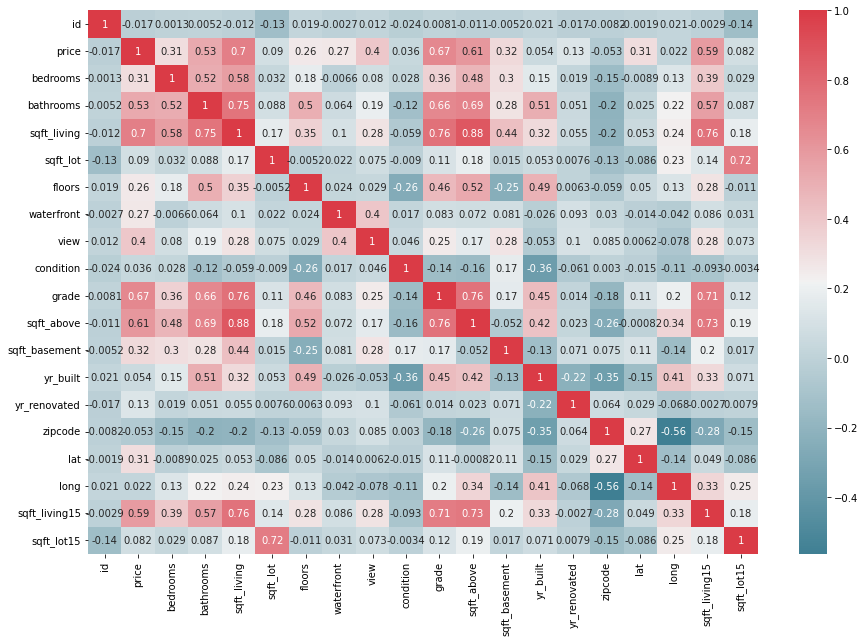

In [8]:
#df.corr()
def correlation_heatmap(df):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(df)

After showing the correlation between prices and other features , i can say that there are many feature in correlation like ( sqft_living15 , sqft_above , bathrooms	 ...etc ) but the **"sqft_living"** is the most correlated with price of house and influence directly .

---


so this is list unordred of features that we can use them in our regression model 
- bathrooms
- sqft_living
- grade
- sqft_above
- sqft_living15 

to conclude w'll use 'sqft_living' for our regression linear model .



In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

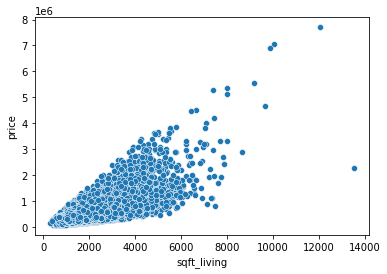

In [100]:
sns.scatterplot(data=df, x="sqft_living", y="price")

[Text(0.5, 0, 'Number of Bedrooms'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Comparison of House price and number of bedrooms')]

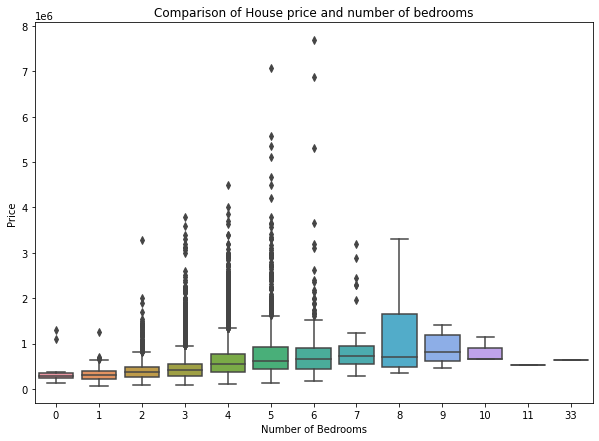

In [101]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='bedrooms', y='price', data=df).set(xlabel='Number of Bedrooms', ylabel='Price', 
                                                      title='Comparison of House price and number of bedrooms')


[Text(0.5, 0, 'square feet'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Comparison of House price and size square feet')]

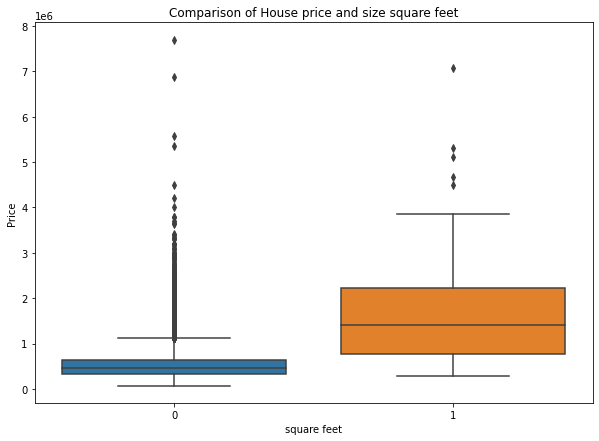

In [102]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='waterfront', y='price', data=df).set(xlabel='square feet', ylabel='Price', 
                                                      title='Comparison of House price and size square feet')

[Text(0.5, 0, 'floors'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Comparison of House price in cities')]

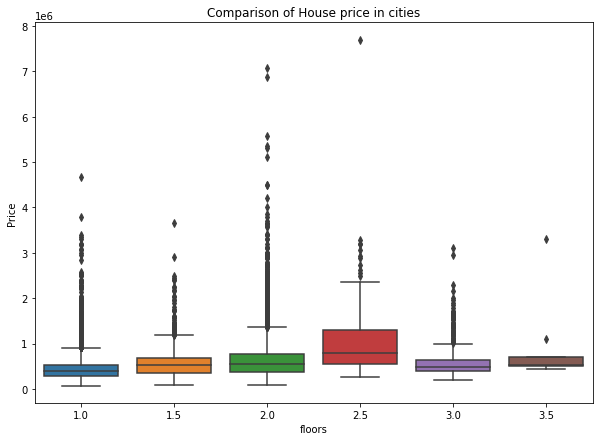

In [106]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='floors', y='price', data=df).set(xlabel='floors', ylabel='Price', 
                                                      title='Comparison of House price in cities')

# Simple linear regression

In [89]:
x=df['sqft_living'].values.reshape(-1,1)
Y=df['price'].values.reshape(-1,1)
x
Y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=123)
lm = LinearRegression(fit_intercept=True)
lm.fit(X_train,Y_train)



LinearRegression()

In [116]:
lm.intercept_

-40058.615220487816

In [111]:
lm.coef_

array([-3.37054567e+04,  3.96218618e+04,  1.08027330e+02,  1.57160598e-01,
        3.12130218e+03,  6.31200866e+05,  5.13955296e+04,  2.57987879e+04,
        1.00826208e+05,  6.99208521e+01,  3.81064780e+01, -2.65061295e+03,
        1.96747750e+01, -5.72225594e+02,  5.99774700e+05, -2.17564074e+05,
        1.96102818e+01, -3.95448737e-01])

In [96]:

predicted = lm.predict(X_test)
predicted1 = lm.predict(X_train)
R1 = metrics.r2_score(y_test,predicted)
R2 = metrics.r2_score(y_train,predicted1)
print(R1)
R2

0.5093453299763637


0.48566812555387384

# Multi linear regression


In [141]:
X=df.drop(columns=['id','price','date'])
Y=df.price

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=123)
lm1= LinearRegression(fit_intercept=True)
lm1.fit(X_train,Y_train)

predicted = lm1.predict(X_test)
predicted1 = lm1.predict(X_train)
R1 = metrics.r2_score(Y_test,predicted)
R2 = metrics.r2_score(Y_train,predicted1)
print(R1)
R2

0.7097399285776788


0.6950920388519016

In [118]:
lm1.intercept_

5522889.530104744

In [119]:
columns = ["condition","waterfront","view","grade"]
df[columns]=df[columns].astype("category")

In [128]:
Y_pred_train = lm1.predict(X_train)
Y_pred_test = lm1.predict(X_test)
print('In-sample MSE is      : ' + str(metrics.mean_squared_error(Y_train, Y_pred_train)))
print('Out-of-sample MSE is  : ' + str(metrics.mean_squared_error(Y_test, Y_pred_test)))
print('-'*100)
print('In-sample RMSE is     : ' + str(np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train))))
print('Out-of-sample RMSE is : ' + str(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test))))

In-sample MSE is      : 40959742414.07035
Out-of-sample MSE is  : 39417205543.99646
----------------------------------------------------------------------------------------------------
In-sample RMSE is     : 202385.1338761579
Out-of-sample RMSE is : 198537.66782149038


# Polynomial linear regression

In [143]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
regressor_pol = LinearRegression()
regressor_pol.fit(X_poly, y_train)

LinearRegression()

In [155]:
y_pred_pol = sc_y.inverse_transform(regressor_pol.predict(poly_reg.transform(sc_X.transform(X_test))))


In [156]:
MSE_pol = mean_squared_error(y_test, y_pred_pol)
R2_score_pol = metrics.r2_score(y_test, y_pred_pol)

In [157]:
print('MSE polynomial regression : ', MSE_pol)
print('R score polynomial regression : ', R2_score_pol)

MSE polynomial regression :  9.18800864186041e+26
R score polynomial regression :  -6765857720782792.0


In [148]:
print('  --------------------------------------------------------------------------')
print('   ///      ||   Simple LR       ||   Multiple LR      ||  Polynomial LR ')
print('  --------------------------------------------------------------------------')
print('  MSE/10^10 ||',  MSE_simple/10000000000    ,'||',   MSE_mul/10000000000   ,' ||',  MSE_pol/10000000000 )
print('  --------------------------------------------------------------------------')
print('  R2 score  ||',  R2_score_simple    ,'||',   R2_score_mul   ,'||',  R2_score_pol )
print('  --------------------------------------------------------------------------')


  --------------------------------------------------------------------------
   ///      ||   Simple LR       ||   Multiple LR      ||  Polynomial LR 
  --------------------------------------------------------------------------


NameError: name 'MSE_simple' is not defined

LinearRegression()

0.7120087605433091
0.7058189857681848


SyntaxError: ignored

Text(0, 0.5, 'price')

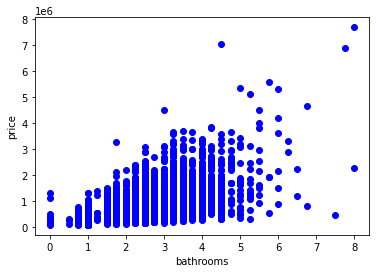

In [65]:
plt.scatter(df['bathrooms'], df['price'], color = 'blue', marker='o')
plt.xlabel('bathrooms')
plt.ylabel('price')

<AxesSubplot:xlabel='grade', ylabel='price'>

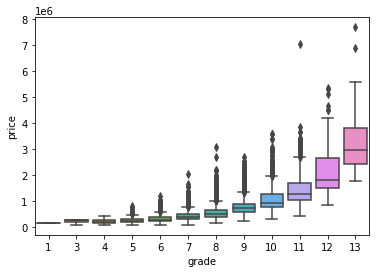

In [127]:
sns.boxplot(x=df['grade'],y=df['price'])
